<p align = 'left'>
<img src = 'https://i.imgur.com/8LTNXxF.jpg'>
</p>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">
O atual projeto visa analisar dados da <b>Alura Voz</b>, a qual consiste em uma empresa de telecomunicações. O objetivo desta análise é obter insights acerca do <b>Churn Rate</b> da empresa e encontrar fatores que estejam influenciando essa métrica.
Os dados desta análise foram obtidos através de uma <b>API</b> por webscrapping.

Na primeira etapa os dados foram trabalhandos, montados e limpos para que aqui fosse possível se realizar a análise e entendimento, principalmente do <b> Churn Rate</b>.

Serão construídos gráficos no intuito de se entender o comportamento dos dados, se há alguma influência do gênero dos clientes ou algum outro fator associado.

Também será realizada uma verificação da correlação das variáveis disponíveis para a análise.

In [2]:
# Importação de pacotes para análise de dados
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importando dados após a limpeza
dados = pd.read_csv('https://raw.githubusercontent.com/askot19/Projetos/main/Telefonia/Dados/aluravoz_clean.csv')
dados.head()

,ID,Evasao,Genero,Senior,Casado(a),Dependentes,Posse,ServicoTelefonico,MultiplasLinhas,ServicodeInternet,...,BackupOnline,ProtecaodeDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,CobrancasemPapel,MetododePagamento,CobrancasMensais,CobrancasTotais
0,0002-ORFBO,Nao,Mulher,0,Sim,Sim,9,Sim,Nao,DSL,...,Sim,Nao,Sim,Sim,Nao,Anual,Sim,Correspondencia,65.6,593.30
1,0003-MKNFE,Nao,Homem,0,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Nao,Sim,Mensal,Nao,Correspondencia,59.9,542.40
2,0004-TLHLJ,Sim,Homem,0,Nao,Nao,4,Sim,Nao,Fibra optica,...,Nao,Sim,Nao,Nao,Nao,Mensal,Sim,Eletronico,73.9,280.85
3,0011-IGKFF,Sim,Homem,1,Sim,Nao,13,Sim,Nao,Fibra optica,...,Sim,Sim,Nao,Sim,Sim,Mensal,Sim,Eletronico,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,1,Sim,Nao,3,Sim,Nao,Fibra optica,...,Nao,Nao,Sim,Sim,Nao,Mensal,Sim,Correspondencia,83.9,267.40


In [4]:
# Visualizando as estatísticas básicas dos dados
dados.describe()

,Senior,Posse,CobrancasMensais,CobrancasTotais
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Através do método **`describe()`** é possível verificar algumas das principais estatísticas dos dados que compõem o Data Frame. As informações obtidas são:
* **`count:`** A contagem dos valores não nulos contidos no Data Frame, ele nos permite ter uma ideia da quantidade de valores possíveis de se analisar e compreender a extensão dos dados estudados;
* **`mean:`** É a média aritmética dos valores contidos na coluna;
* **`std:`** É o desvio padrão da medida, ele infere valores de incerteza para a grandeza de estudos, contudo, não será utilizado para esta análise em questão;
* **`min:`** É o menor valor do campo, pode auxiliar em diversas análises, quando por exemplo o valor não assume grandezas negativas;
* **`25%, 50% e 75%:`** Os quartis auxiliam na construção de boxplots e identificação de *Outliers* através do método dos quartis;
* **`max:`** É o maior valor, indicando o limite que a coluna pode alcançar.

O método **`describe()`** é excelente para uma pré-análise e auxilia em diversos tipos de análise como esta, que é uma Análise Exploratória de Dados.

[Text(0.5, 0, 'Evasão'), Text(0, 0.5, 'Contagem')]

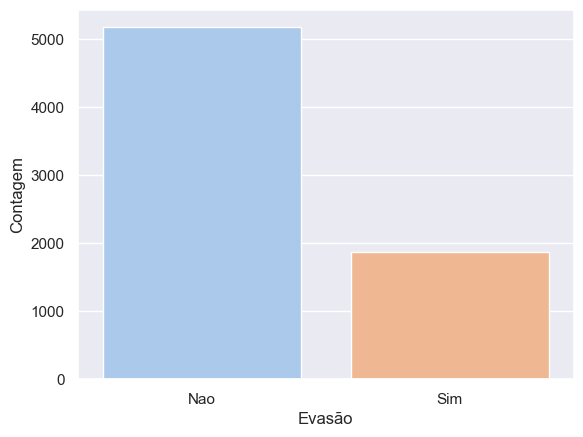

In [5]:
# Estabelecendo tema e construindo o primeiro gráfico
sns.set_theme(style = 'darkgrid', palette = 'pastel')
ax = sns.countplot(data = dados, x = 'Evasao')
ax.set(xlabel = 'Evasão', ylabel = 'Contagem')

No gráfico acima temos uma visualização da quantidade total de evasões e permanência de clientes da empresa. Este gráfico nos serve como um parâmetro delimitador, em que nenhuma categoria específica deva apresentar um valor superior a 7000 mil clientes (considerando tanto os evadidos, quanto os permanentes). A nossa análise deve ser mais profunda, e considerar todas categorias para podermos compreender os fatores que influenciam os quase 2000 clientes evadidos dos nossos serviços.

[Text(0.5, 0, 'Evasão'), Text(0, 0.5, 'Contagem')]

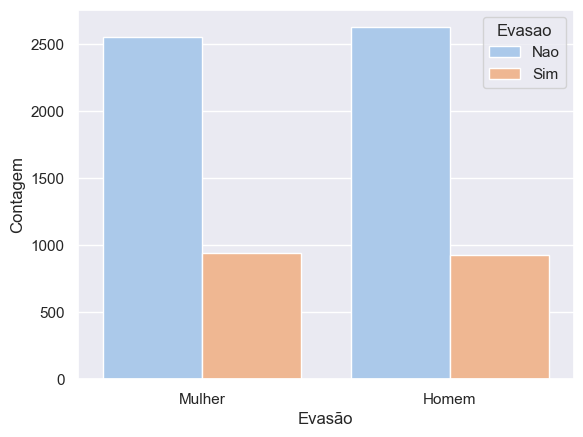

In [6]:
#Conferindo a influência do gênero dos clientes
ax = sns.countplot(data = dados, x = 'Genero', hue = 'Evasao')
ax.set(xlabel = 'Evasão', ylabel = 'Contagem')

Considerando o último gráfico, podemos observar que o fator gênero não influencia a decisão do cliente em manter ou não os serviços de atendimento da Alura Voz. Não há uma causa que possamos associar com esta categoria de análise. Passemos então para a próxima categoria.

<AxesSubplot:xlabel='Genero'>

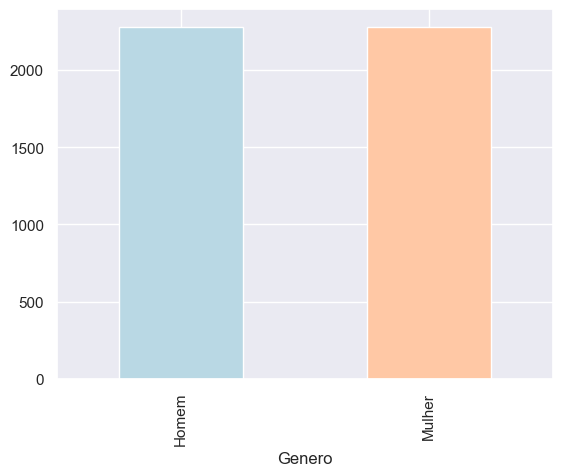

In [7]:
#Conferindo as médias das cobranças totais por gênero
med_gen = dados.groupby('Genero').mean()['CobrancasTotais']
med_gen.plot(kind='bar', color=['#b9d8e4', '#ffc8a5'])

Podemos observar que, em média, não há variação dos valores cobrados por gênero. Os gastos médios realizados por homens e mulheres é basicamente o mesmo.

<AxesSubplot:xlabel='Genero'>

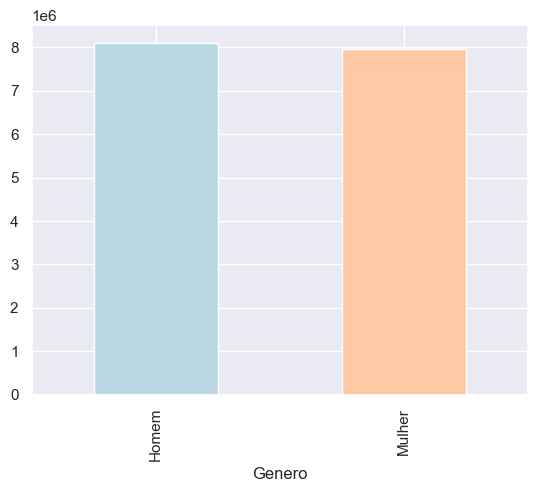

In [8]:
#Conferindo os valores totais gastos por gênero
som_gen = dados.groupby('Genero').sum()['CobrancasTotais']
som_gen.plot(kind='bar', color=['#b9d8e4', '#ffc8a5'])

Aqui observamos que os valores totais são praticamente os mesmos para os gêneros, tendo uma ligeira superação do sexo masculino.

[Text(0.5, 0, 'Dependentes'), Text(0, 0.5, 'Contagem')]

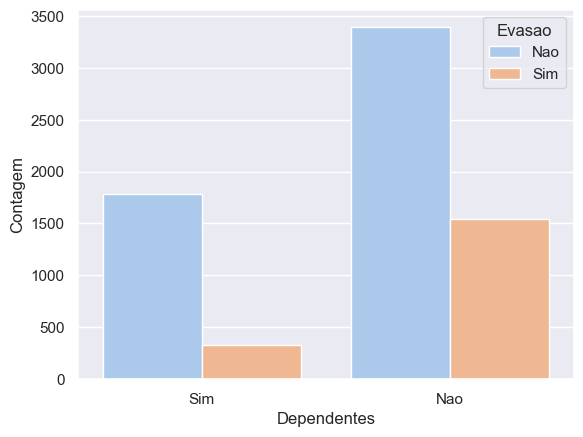

In [9]:
#Conferindo a influência de dependentes dos clientes
ax = sns.countplot(data = dados, x = 'Dependentes', hue = 'Evasao')
ax.set(xlabel = 'Dependentes', ylabel = 'Contagem')

No gráfico que considera os clientes que possuem dependentes, podemos ve maior adesão por aqueles que não possuem crianças, mas também maior Churn Rate associado a essa categoria também. Muito provavelmente essa alta taxa de evasão é devida aos custos atrelados à manutenção de pessoas solteiras, em que serviços como telefonia, internet e TV por assinatura são vistos como luxo, sendo fortes candidatos a cortes nos orçamentos familiares. Uma vez que a Alura Voz tem como objetivo e missão atender a todos nichos e estar presente nos lares de todos os diferentes núcleos familiares, a criação de promoções para este público em específico pode auxiliar na permanência destes clientes e assim reduzir as taxas de de evasão.

<AxesSubplot:xlabel='Dependentes'>

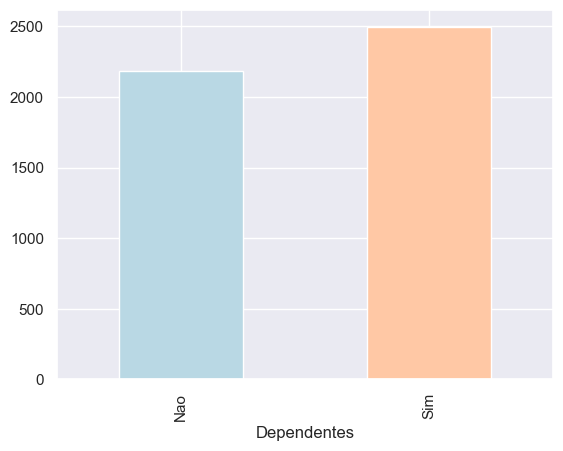

In [10]:
#Conferindo os cobranças médias totais por dependentes
med_dep = dados.groupby('Dependentes').mean()['CobrancasTotais']
med_dep.plot(kind='bar', color=['#b9d8e4', '#ffc8a5'])

Observamos então que os gastos médios realizados por famílias com dependentes é superior a aqueles que não possuem dependentes. Isso envolve maiores gastos realizados por famílias do que por indivíduos.

<AxesSubplot:xlabel='Dependentes'>

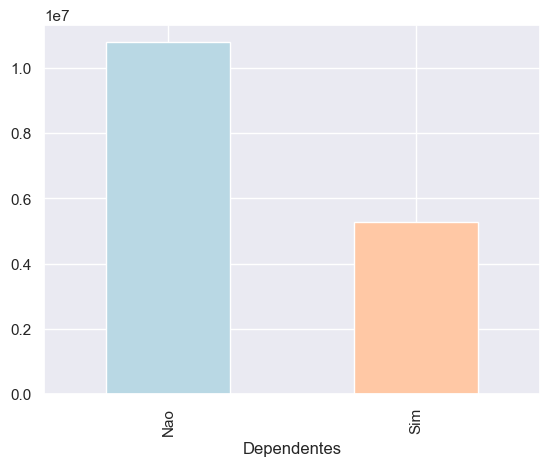

In [11]:
#Coferindo cobranças totais por dependentes
som_dep = dados.groupby('Dependentes').sum()['CobrancasTotais']
som_dep.plot(kind='bar', color=['#b9d8e4', '#ffc8a5'])

Contudo, podemos observar que os valores totais são muito maiores para os clientes que não possuem dependentes, desta maneira, podemos inferir que há um número consideravelmente maior de clientes que não possuem dependentes para termos um valor médio menor. Vamos verificar essa hipótese:

<AxesSubplot:xlabel='Dependentes'>

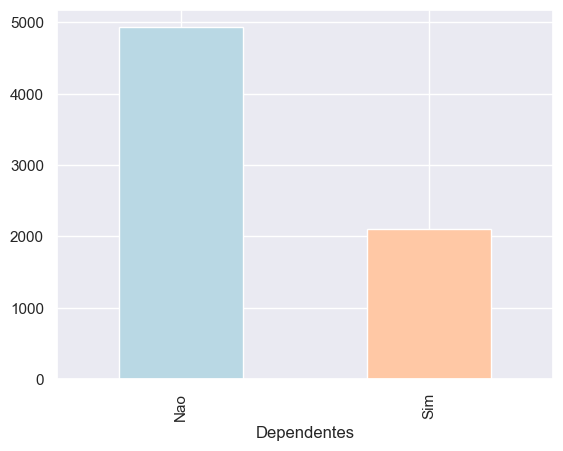

In [12]:
num_cli_dep = dados.groupby('Dependentes').count()['ID']
num_cli_dep.plot(kind='bar', color=['#b9d8e4', '#ffc8a5'])

Podemos observar que a quantidade de clientes sem dependentes é mais que o dobro dos clientes que possuem dependentes, desta forma, essa parcela de clientes deve receber bastante atenção, uma vez que as taxas de evasão desta categoria é consideravelmente superior como visto anteriormente. É de suma importância para a empresa reduzir taxas de evasão dessa categoria a fim de se obter maiores lucros.

[Text(0.5, 0, 'Serviço Telefônico'), Text(0, 0.5, 'Contagem')]

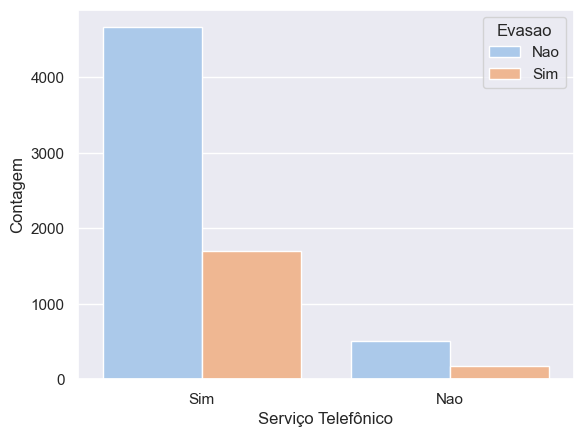

In [13]:
#Conferindo a influência de Serviço Telefônico
ax = sns.countplot(data = dados, x = 'ServicoTelefonico', hue = 'Evasao')
ax.set(xlabel = 'Serviço Telefônico', ylabel = 'Contagem')

Em questões proporcionais é possível observar que, aqueles que possuem o serviço telefônico evadem mais a empresa do que aqueles que não o possuem. Isso pode se explicar principalmente pelo fator de que as telefonias fixas hoje em dia são muito custosas e não trazem grandes benefícios aos clientes, esta taxa de evasão mais alta pode indicar essa desistência provinda principalmente dos clientes os quais possuem apenas este serviço. Uma solução possível para isso seria o oferecimento de outros serviços e a Alura Voz investir na telefonia móvel para abarcar um maior número de clientes e evitar assim a desistência dos serviços.

[Text(0.5, 0, 'Múltiplas Linhas'), Text(0, 0.5, 'Contagem')]

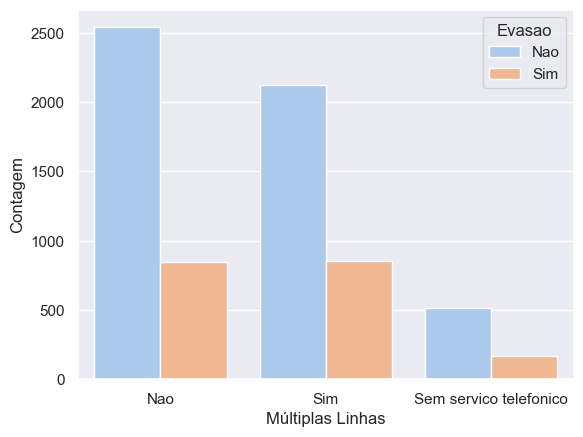

In [14]:
#Conferindo a influência de Múltiplas Linhas
ax = sns.countplot(data = dados, x = 'MultiplasLinhas', hue = 'Evasao')
ax.set(xlabel = 'Múltiplas Linhas', ylabel = 'Contagem')

Para a categoria de múltiplas linhas temos taxas de evasão semelhantes, embora haja um menor número de clientes aderindo a essa categoria. Geralmente esse tipo de contratação é realizada por empresas, não necessitando realizar algum tipo de intervenção para que se mudem as taxas. É um nicho bem específico e muito divergente do demais, não compensando investir em mudanças tão drásticas na empresa.

[Text(0.5, 0, 'Serviço de Internet'), Text(0, 0.5, 'Contagem')]

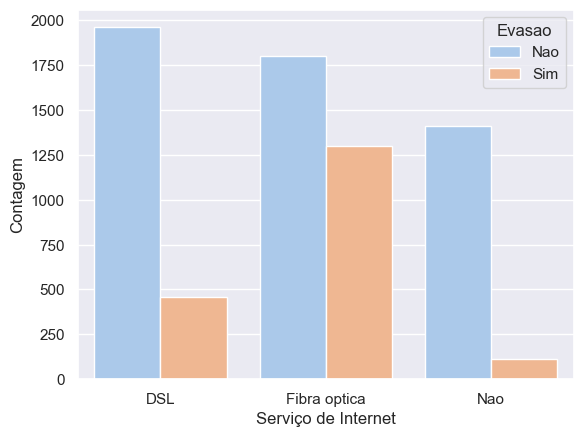

In [15]:
#Conferindo a influência de Serviço de Internet
ax = sns.countplot(data = dados, x = 'ServicodeInternet', hue = 'Evasao')
ax.set(xlabel = 'Serviço de Internet', ylabel = 'Contagem')

A modalidade de fibra óptica possui alta taxa de evasão, o que pode indicar um grande problema com o fornecimento do serviço. Talvez problemas com a qualidade do serviço, ou mesmo preços mais altos, uma vez que é uma tecnologia relativamente nova e, por isso, requer maior investimento dos clientes. Programas promocionais ou mesmo melhores condições de serviço e pagamento devem diminuir as altas taxas de evasão apresentadas aqui.

[Text(0.5, 0, 'Segurança Online'), Text(0, 0.5, 'Contagem')]

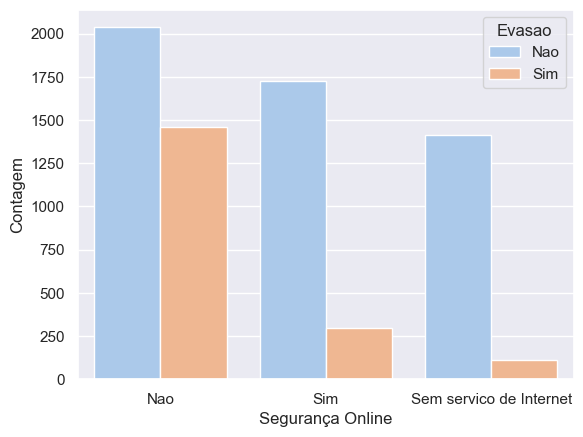

In [16]:
#Conferindo a influência de Segurança Online
ax = sns.countplot(data = dados, x = 'SegurancaOnline', hue = 'Evasao')
ax.set(xlabel = 'Segurança Online', ylabel = 'Contagem')

Para aqueles clientes que não possuem segurança online junto ao seu plano de adesão, notamos grande taxa de evasão, uma vez que suas máquinas tornam-se vulneráveis e muito expostas a ataques como tentativas de phishing (roubo de informações como senhas, informações bancárias, etc.), vírus e malwares. Estes ataques virtuais estão atrelados à desistência dos clientes, e oferecer pacotes promocionais incluindo sua seguranç deve reduzir as taxas de evasão dos clientes.

[Text(0.5, 0, 'Backup Online'), Text(0, 0.5, 'Contagem')]

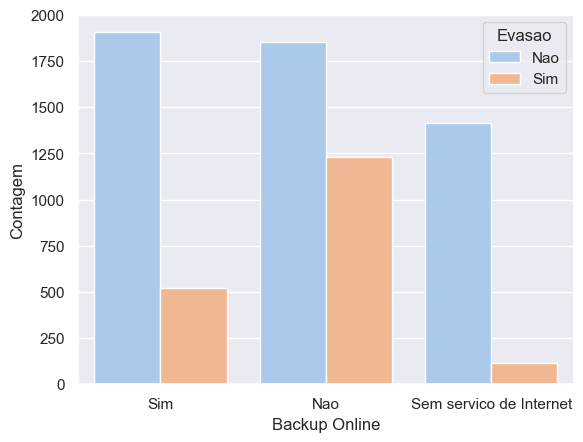

In [17]:
#Conferindo a influência de Backup Online
ax = sns.countplot(data = dados, x = 'BackupOnline', hue = 'Evasao')
ax.set(xlabel = 'Backup Online', ylabel = 'Contagem')

Novamente, os ataques por Malwares e Vírus podem danificar seus dispositivos e corromper arquivos. Aqueles que não possuem o sistema de Backup Online possuem maior taxa de evasão justamente por perderem seus arquivos e sentirem-se lesados por conta do serviço aderido. Juntamente com o pacote de Segurança Online, deve-se ter um sistema de backup em nuvem para oferecer maior segurança às informações dos clientes e assim deixá-los mais satisfeitos com o serviço prestado.

[Text(0.5, 0, 'Proteção de Dispositivo'), Text(0, 0.5, 'Contagem')]

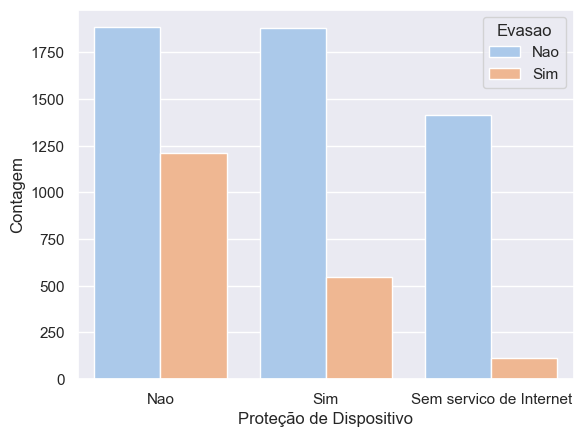

In [18]:
#Conferindo a influência de Proteção de Dispositivo
ax = sns.countplot(data = dados, x = 'ProtecaodeDispositivo', hue = 'Evasao')
ax.set(xlabel = 'Proteção de Dispositivo', ylabel = 'Contagem')

Novamente, aqueles que não proteção de seus dispositivos podem sofrer ataques de vírus e malwares, fazendo com que seus equipamentos sofram avarias. Um seguro envolvendo os seus equipamentos pode solucionar esse problema e assim reduzir o Churn Rate desta categoria.

[Text(0.5, 0, 'Suporte Técnico'), Text(0, 0.5, 'Contagem')]

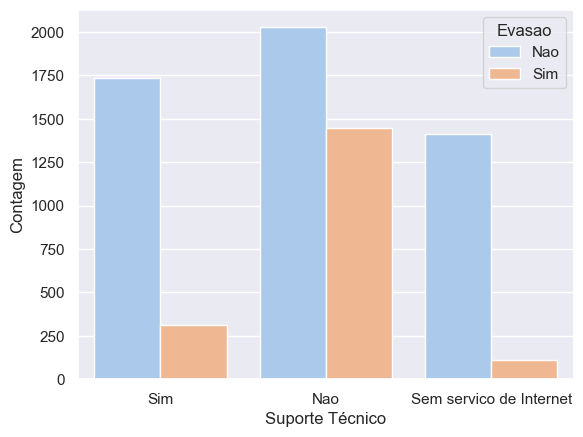

In [19]:
#Conferindo a influência de Suporte Técnico
ax = sns.countplot(data = dados, x = 'SuporteTecnico', hue = 'Evasao')
ax.set(xlabel = 'Suporte Técnico', ylabel = 'Contagem')

A acessibilidade digital é outro ponto que dificulta o uso de usuários mais leigos. Muitas vezes os clientes pagam por um serviço que nem mesmo sabem utilizar e, quando se dão conta, acabam desistindo de mantê-lo. A principal solução seria oferecer o suporte técnico na adesãoe explicar como este funciona, evitando assim aumentos no Churn Rate desta categoria.

[Text(0.5, 0, 'Streaming de TV'), Text(0, 0.5, 'Contagem')]

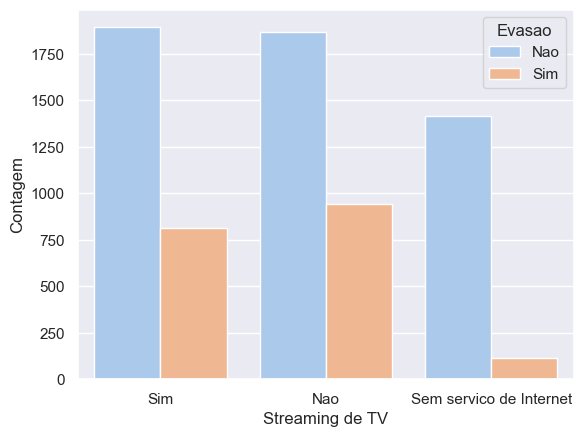

In [20]:
#Conferindo a influência de Streaming de TV
ax = sns.countplot(data = dados, x = 'StreamingTV', hue = 'Evasao')
ax.set(xlabel = 'Streaming de TV', ylabel = 'Contagem')

Streaming de TV não aprensenta mudança de taxa sensível para aqueles que possuem ou não este serviço. Não há apontamentos possíveis que possamos realizar aqui neste ponto.

[Text(0.5, 0, 'Streaming de Filmes'), Text(0, 0.5, 'Contagem')]

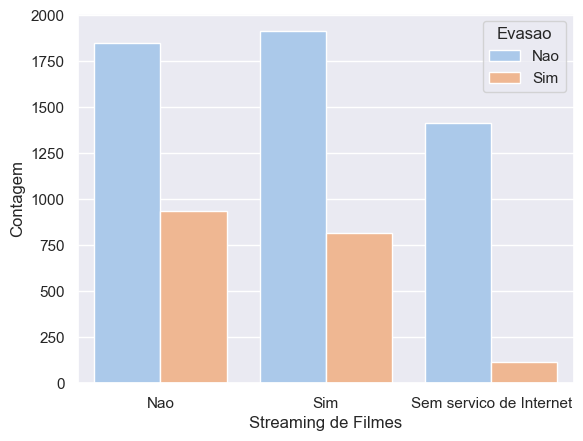

In [22]:
#Conferindo a influência de Streaming de Filmes
ax = sns.countplot(data = dados, x = 'StreamingFilmes', hue = 'Evasao')
ax.set(xlabel = 'Streaming de Filmes', ylabel = 'Contagem')

O mesmo podemos dizer quanto aos Streaming de Filmes, não sendo necessários apontamentos específicos.

[Text(0.5, 0, 'Tipo de Contrato'), Text(0, 0.5, 'Contagem')]

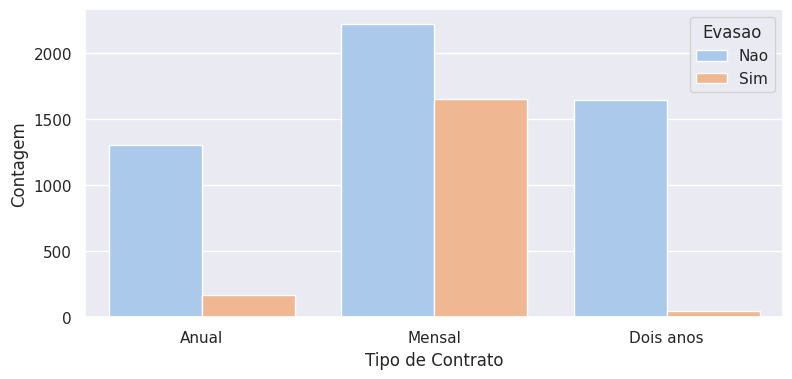

In [ ]:
#Conferindo a influência do Tipo de Contrato
ax = sns.countplot(data = dados, x = 'Contrato', hue = 'Evasao')
ax.set(xlabel = 'Tipo de Contrato', ylabel = 'Contagem')

Quanto ao tipo de contratação, vemos maior taxa de desistência nos contratos de menor tempo de adesão, o mensal. A facilidade da desistência para assinaturas mensais faz com que os clientes abandonem a empresa, isso também pode estar associado aos valores mensais serem mais altos. É possível obserar que as menores taxas proporcionais ocorrem nos contratos de dois anos, muito provavelmente por conta do valor mensal ser muito menor e rentável para os clientes da Alura Voz. Mostrar maior incentivo, reduzir taxas e impostos da categoria bianual pode trazer maior número de adesão e reduzir o Churn Rate da categoria mensal, fazendo com que os clientes permaneçam por maiores períodos e conferindo satisfação a eles.

[Text(0.5, 0, 'Cobranca sem Papel'), Text(0, 0.5, 'Contagem')]

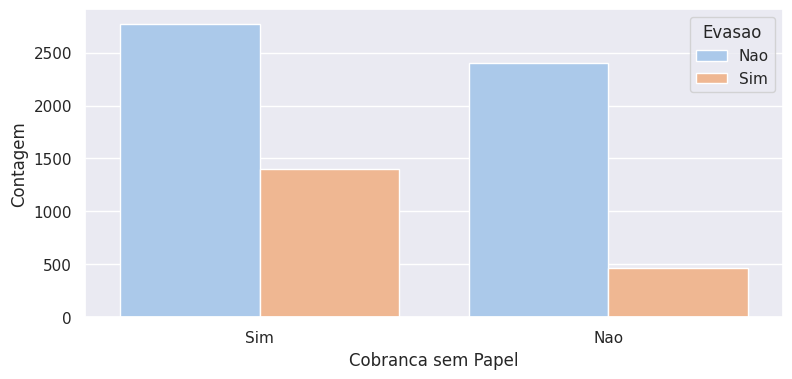

In [ ]:
#Conferindo a influência da Cobrança sem Papel
ax = sns.countplot(data = dados, x = 'CobrancasemPapel', hue = 'Evasao')
ax.set(xlabel = 'Cobranca sem Papel', ylabel = 'Contagem')

Verificamos maior taxa de desistência dos serviços quando observamos a categoria de cobrança sem papel. Muito provavelmente por conta do cliente acabar esquecendo-se do pagamento e entrando na inadimplência. Uma boa maneira para reduzir esse problema seria reduzir um pouco o valor da fatura e enviar lembretes por notificação através dos canais de atendimento da empresa como aplicativos, e-mail ou mesmo recados telefônicos pré-programados. Os incentivos desta dategoria facilitaria a vida do cliente e evitaria inadimplência.

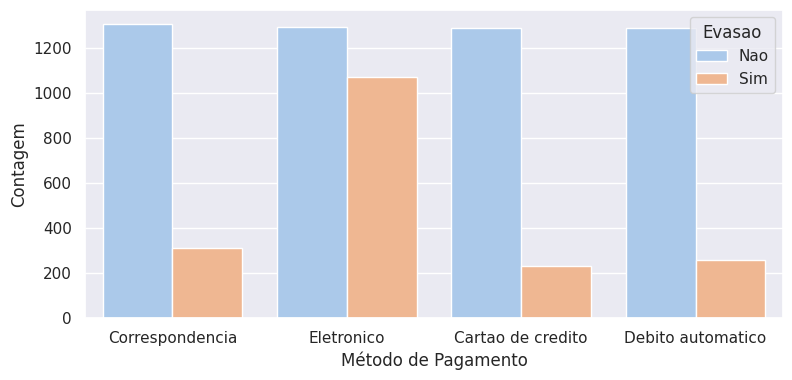

In [ ]:
#Conferindo a influência do Método de Pagamento
ax = sns.countplot(data = dados, x = 'MetododePagamento', hue = 'Evasao')
ax.set(xlabel = 'Método de Pagamento', ylabel = 'Contagem')
sns.set(rc = {'figure.figsize':(9, 4)})

O mesmo acontececom o método de pagamento eltrônico, pois muitos dos cliente não utilizam o e-mail de cadastro junto a empresa com frequência, fazendo com que os clientes esqueçam-se dos pagamentos e entrem em inadimplência junto a empresa. Incentivar que o cliente participe dos grupos de pagamentos automáticos apresenta maiores vantagens tanto para a empresa quanto para o cliente, uma vez que os serviços não são cessados e garante a sua satisfação com a empresa não levando seu nome aos órgãos de cobrança e proteção ao crédito brasileiro.

<ipython-input-90-e4bc3da54f63>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


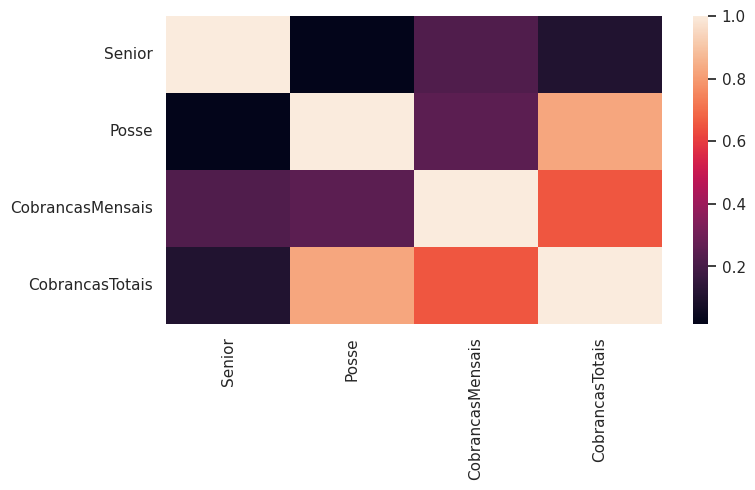

In [ ]:
# Conferindo a correlação entre as variáveis
sns.heatmap(dados.corr())
sns.set(rc = {'figure.figsize':(4, 4)})

Por fim, verificamos a correlação das variáveis contidas em nosso Data Frame.Concluindo que devemos ter cuidado ao realizar nossas análises envolvendo Cobranças Totais, Posse e Cobranças Mensais que são as variáveis mais interdenpendentes do nosso projeto. Talvez, para procedimentos mais complexos fosse interesssante não manter estas variáveis, a fim de não produzir erros atrelados a elas.